In [1]:
bayesplay::loadpackages()

# Computing Bayes factors Part II

## Priors on raw effects
To explore this, we're going to look at a few examples from [Dienes (2014)](https://www.frontiersin.org/articles/10.3389/fpsyg.2014.00781).  

Dienes (2014) presents an example of Dienes et al (2012) where it was predicted that negative mood would **reduce** a certain type of learning. Participants performed a two-alternative forced choice task where chance was 50%. Learning was measured in a neutral condition and a negative mood condition. It was found that in the neutral condition accuracy was 70%. Therefore, the theory that negative mood **reduces learning** would predict that in the negative mood condition accuracy would be somewhere between 50% (i.e., chance) and 70%. 
It happened to be the case that in the negative mood condition accuracy was 65%. How can one analyse these data?

One option is to do a *t*-test. It so happened that a *t*-test produced the following result: *t*(50) = 0.5, *p* = .62. Another option would be a **Bayes factor analysis**. To do this we'll need 4 things:

1. A parameter to make inferences about
2. A likelihood function relating our data to likely values of the parameter
3. A model of $\mathcal{H}_0$
4. A model of $\mathcal{H}_1$

For this example, we'll make inferences about the **mean difference in accuracy**. For our likelihood function, we'll choose either a **normal distribution** or a **scaled and shifted *t* distribution**. For our $\mathcal{H}_0$, we'll keep it simple and choose a point null—that is, mean difference = 0. For our $\mathcal{H}_1$, however, we're actually going to try represent the predictions of the theory. 

So to recap, the theory predicts that in the negative condition, accuracy will be somewhere between 50-70% (i.e., more than chance but less than in the neutral condition). In terms of the mean difference between conditions, this means that the theory predicts a mean difference between 0% and 20%. We'll follow Dienes (2014) and represent this prediction with the **Uniform** prior between 0% and 20% (however, you might want to think about other ways to represent this). 

So let's put the parts together. 



In [2]:
# 1


# to define the likelihood we'll need the mean and the standard error

negative_mood_acc = 65
neutral_acc = 70
mean_diff = abs(negative_mood_acc - neutral_acc)
t_stat = 0.5
se = mean_diff / t_stat

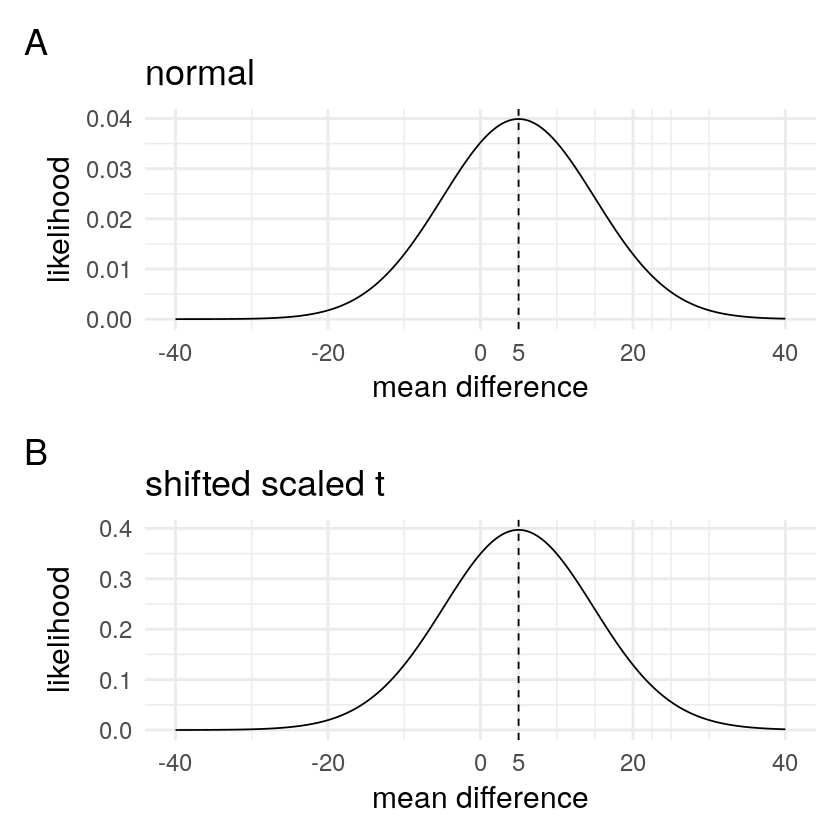

In [4]:
# 2


# define the likelihood
# we'll use a normal likelihood
# another option could be to use the scaled shifted t distribution
# but we'll use it because Dienes (2014) uses a normal


data_model1 = norm.lik(center = mean_diff, scale =  se)
data_model2 = scaled.shifted.t.lik(center = mean_diff, scale =  se, df = 50)


norm = plot(data_model1, theta = seq(-40,40,.1)) + geom_vline(xintercept = mean_diff, linetype = 2) + 
scale_x_continuous(name = "mean difference", breaks = c(seq(-40,40,20),mean_diff)) + theme_minimal(18) + 
labs(title = "normal")
scaled_t = plot(data_model2, theta = seq(-40,40,.1)) + geom_vline(xintercept = mean_diff, linetype = 2) + 
scale_x_continuous(name = "mean difference", breaks = c(seq(-40,40,20),mean_diff)) + theme_minimal(18) + 
labs(title = "shifted scaled t")

norm / scaled_t + plot_annotation(tag_levels = "A")

data_model = data_model1

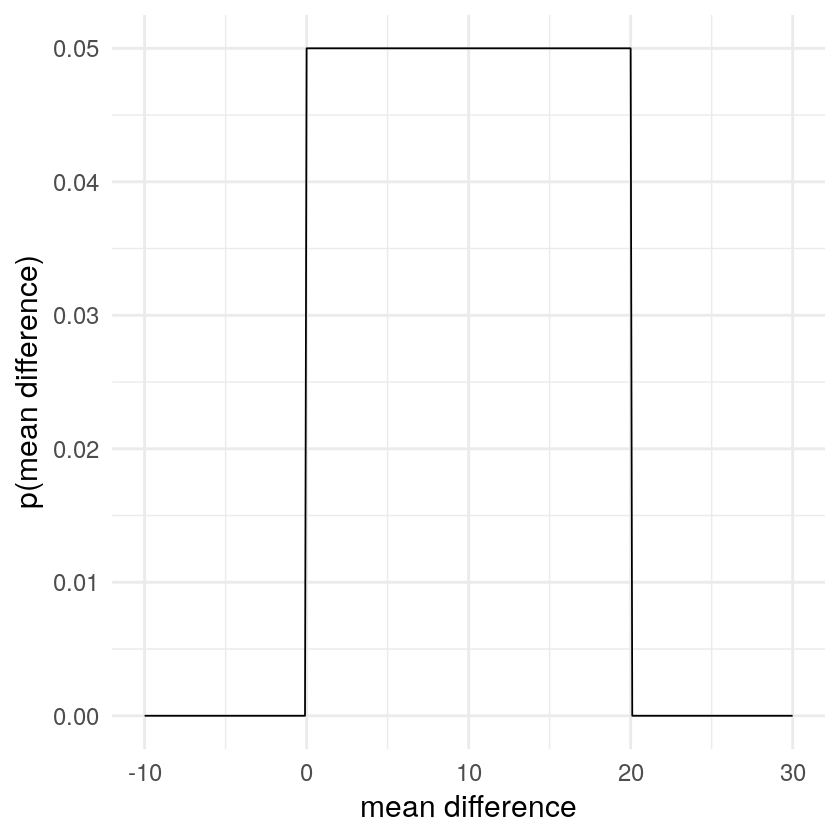

In [5]:
# 3

# define model / priors

h0_model = function(theta.range){
    list(func = function(theta) ifelse(theta == 0, 1, 0), # a point null with mean diff = 0
         theta.range = theta.range)
}

h1_model = function(theta.range){
    list(func = function(theta) dunif(x = theta, min = 0, max = 20), # uniform prior from 0 to 20
         theta.range = theta.range)
}

# plot the h1 prior 

theta.range = seq(-10,30,.1) # from -10 to +30 in steps 0.1

# then make a tibble with the data for the plot
tibble(theta = theta.range, p = h1_model(theta.range)$func(theta.range)) %>% 
ggplot(aes(x = theta, y = p)) + geom_line() + scale_x_continuous(name = "mean difference") + 
scale_y_continuous(name = "p(mean difference)") + theme_minimal(18)


In [7]:
# 4

# multiply the prior and likelihoods and priors
M0 = data_model * h0_model(theta.range = c(0,0))

M1 = data_model * h1_model(theta.range = c(0, Inf))


BF10 = M1$integral / M0$integral
glue::glue("B<sub>10</sub> = {round(BF10,2)}") %>% IRdisplay::display_markdown()

B<sub>10</sub> = 0.89

Now that we have our BF as a number, we'll convert that into a verbal label using the categories for [Wagenmakers et al (2017)](https://doi.org/10.3758/s13423-017-1323-7).

In [8]:
#5 

bfsay(BF10, numerator = "M1", denominator = "M0")

Using the levels from  Wagenmakers et al (2017; https://doi.org/10.3758/s13423-017-1323-7)
A BF of 0.887225881943733 indicates:
Anecdotal evidence for M0


So we can see that once we take into account the predictions of the theory, our difference between conditions doesn't really discriminate between $\mathcal{H}_0$ and $\mathcal{H}_1$. We did find **some** evidence in favour of $\mathcal{H}_0$, but it wasn't very much at all. 

Dienes extends the example a bit to show how **BFs** and *p*-values will sometimes lead to different conclusions. It's worth examining the example to understand why this is the case. It'll help us understand both **BFs** and *p*-values better. 

Dienes asks to consider two examples:

1. A mean difference of 1 with a standard error of 10
2. A mean difference of 1 with a standard error of 1

He goes on to calculate *p* values and **BFs** (using the above model<sup>1</sup>) for both examples. We'll do the same, and examine the results. 


<sup>1</sup><small>A key point here is that the exact same priors are used for both examples. We might want to question whether this is reasonable.</small>


In [9]:
# 6

# Example 1 (t test)

mean_diff = 1
se.1 = 10
df = 50
t_stat.1 = mean_diff / se.1
p_value.1 = 2 * pt(t_stat.1, df,lower.tail = F)

glue::glue("For Example 1, a standard *t* test gives the result: *t*({df}) = {round(t_stat.1,2)}, 
*p* = {round(p_value.1,2)}") %>% 
IRdisplay::display_markdown()

For Example 1, a standard *t* test gives the result: *t*(50) = 0.1, 
*p* = 0.92

In [10]:
# 7

# Example 1 with BFs

# We'll use the same priors as before so we just have to change the likelihood (aka data mode)

data_model.1 = norm.lik(center = mean_diff, scale =  se.1)

M0 = data_model.1 * h0_model(theta.range = c(0,0))

M1 = data_model.1 * h1_model(theta.range = c(0, Inf))
BF01.1 = M0$integral / M1$integral
glue::glue("For example 1, the BF analysis gives B<sub>01</sub> = {round(BF01.1,2)}") %>%
IRdisplay::display_markdown()
bfsay(BF01.1,"M0","M1")

For example 1, the BF analysis gives B<sub>01</sub> = 1.55

Using the levels from  Wagenmakers et al (2017; https://doi.org/10.3758/s13423-017-1323-7)
A BF of 1.55259053332338 indicates:
Anecdotal evidence for M0


In [11]:
# 7

# Example 2 (t test)

mean_diff = 1
se.2 = 1
df = 50
t_stat.2 = mean_diff / se.2
p_value.2 = 2 * pt(t_stat.2, df,lower.tail = F)

glue::glue("For Example 2, a standard *t* test gives the result: *t*({df}) = {round(t_stat.2,2)}, 
*p* = {round(p_value.2,2)}") %>% 
IRdisplay::display_markdown()

For Example 2, a standard *t* test gives the result: *t*(50) = 1, 
*p* = 0.32

In [13]:
# 8

# Example 2 with BFs

# We'll use the same priors as before so we just have to change the likelihood (aka data mode)

data_model.2 = norm.lik(center = mean_diff, scale =  se.2)

M0 = data_model.2 * h0_model(theta.range = c(0,0))

M1 = data_model.2 * h1_model(theta.range = c(0, Inf))
BF01.2 = M0$integral / M1$integral
glue::glue("For example 2, the BF analysis gives B<sub>01</sub> = {round(BF01.2,2)}") %>%
IRdisplay::display_markdown()
bfsay(BF01.2,"M0","M1")

For example 2, the BF analysis gives B<sub>01</sub> = 5.75

Using the levels from  Wagenmakers et al (2017; https://doi.org/10.3758/s13423-017-1323-7)
A BF of 5.75200016141882 indicates:
Moderate evidence for M0


Understanding the difference between these two inferences highlights how the two kinds of analysis ask different questions. Remember, *p* values ask about whether **data are surprising** given a particular parameter value. In contrast, **BFs** ask about **plausible values of a parameter**. We can highlight this different by plotting, on the same figure, the range of **unsurprising** data values and the **likely values of the parameter** given our data.


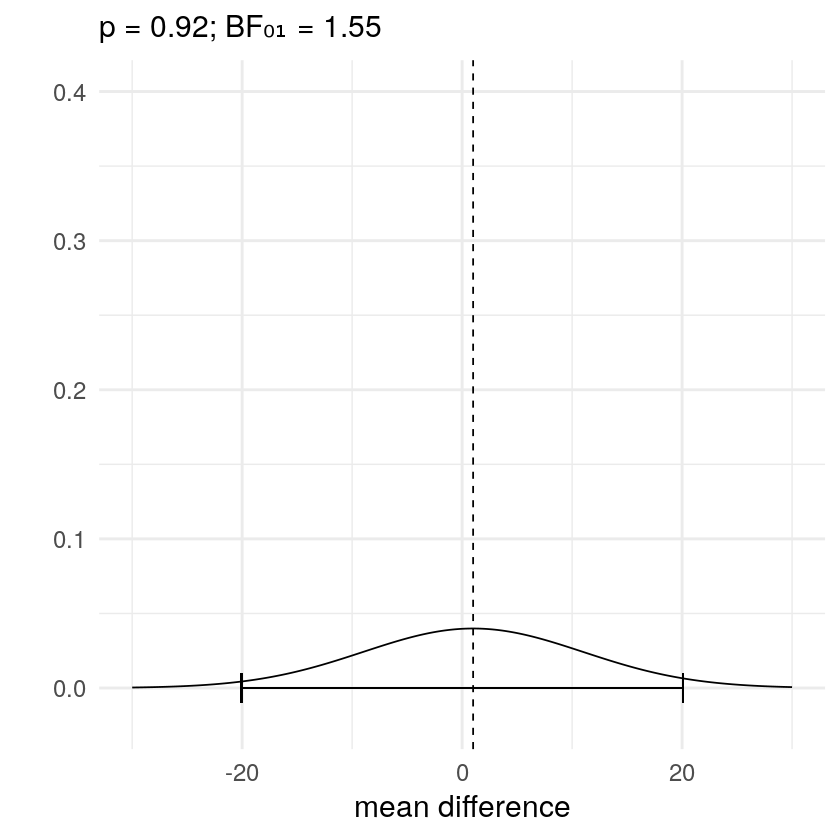

In [14]:
# 9

# Example 1

# First get the unsurprising range of data values

# work out the range of unsurprising values in t units
t_range.1 = qt(.975, df = 50, ncp = 0)

# unscale this so that it's in original units
mean_range.1 = t_range.1 * se.1

plot(data_model.1, theta = seq(-30,30,.1)) + ylim(c(-.02,.4)) +
geom_errorbarh(mapping = aes(xmin = -mean_range.1, xmax = mean_range.1, y = 0), height = .02) + 
geom_vline(xintercept = mean_diff, linetype = 2 ) + theme_minimal(18) +
labs(subtitle = glue::glue("p = {round(p_value.1,2)}; BF₀₁ = {round(BF01.1,2)}"), x = "mean difference", y = "")

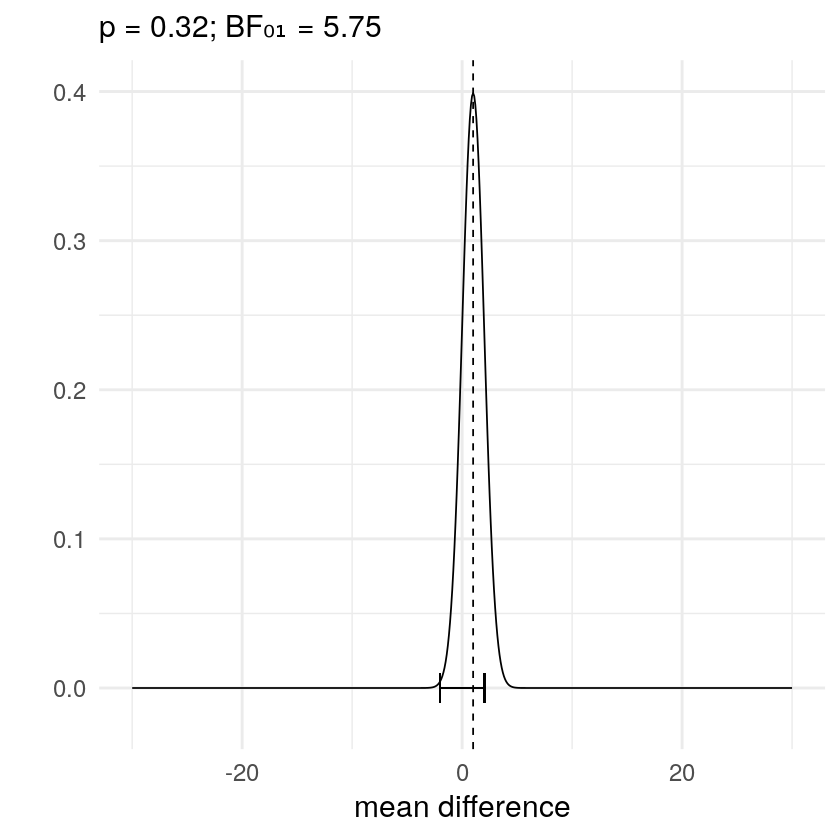

In [15]:
# 10

# Example 2

# First get the unsurprising range of data values

# work out the range of unsurprising values in t units
t_range.2 = qt(.975, df = 50, ncp = 0)

# unscale this so that it's in original units
mean_range.2 = t_range.2 * se.2

plot(data_model.2, theta = seq(-30,30,.1))  + ylim(c(-.02,.4)) +
geom_errorbarh(mapping = aes(xmin = -mean_range.2, xmax = mean_range.2, y = 0), height = .02) + 
geom_vline(xintercept = mean_diff, linetype = 2 ) + theme_minimal(18)  +
labs(subtitle = glue::glue("p = {round(p_value.2,2)}; BF₀₁ = {round(BF01.2,2)}"), x = "mean difference", y = "")

In the plots we can see that in example 1, a very wide range of values of the mean difference could plausibly produce the value of the mean difference we actually observed. In example 2, however, the range of plausible values for the mean difference is very small. In example 1, the range of values includes values that are both very big and very small. That is, data show that we're very uncertain about the actual value of the mean difference with the likelihood being wide and spread out; therefore, the BF value does allow us to make any strong conclusions either way about which model is best supported. In example 2, however, the range is narrow and all the values are very close to 0 (our null value)—that is, the likelihood is highly peaked near 0.

The frequentist inference asks something completely different. We set the parameter to 0, and then generate data based on this. We compare this generated data with our actual data and ask if it's surprising or not. From the first plot, we see that the "unsurprising" range is very large. Our data lies somewhere near the middle of the range. In the second figure, the range is very narrow. As a result, our data now lies right near the edge of the range. 

Again, because this is not a class on frequentist inference I won't give details on what I think the **correct** frequentist analysis for these example should be. But these examples are illustrative because they employ the **common** way **most people** would analyse this kind data.